# Прогнозирование таргета SalePrice

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from feature_engine.imputation import CategoricalImputer

In [35]:
data = pd.read_csv("../houseprice.csv")
data.shape

(1460, 81)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Общая информация о доме

| Признак        | Значение                                                |
| -------------- | ------------------------------------------------------- |
| `Id`           | Уникальный идентификатор дома                           |
| `MSSubClass`   | Класс здания (по назначению) — числовой код типа жилища |
| `MSZoning`     | Зонирование (жилое, промышленное и т.п.)                |
| `LotFrontage`  | Ширина участка, примыкающего к улице (в футах)          |
| `LotArea`      | Площадь участка (в квадратных футах)                    |
| `Street`       | Тип дороги (асфальт, гравий)                            |
| `Alley`        | Тип переулка (если есть)                                |
| `LotShape`     | Форма участка (регулярный, трапеция и т.п.)             |
| `LandContour`  | Контур участка (ровный, скат и т.п.)                    |
| `Utilities`    | Коммуникации (вода, электричество)                      |
| `LotConfig`    | Конфигурация участка (угловой, внутри квартала и т.д.)  |
| `LandSlope`    | Уклон участка                                           |
| `Neighborhood` | Район (название)                                        |
| `Condition1/2` | Прилегающие объекты (дороги, железные дороги и пр.)     |

Тип дома и его конструкция

| Признак        | Значение                                         |
| -------------- | ------------------------------------------------ |
| `BldgType`     | Тип здания (отдельный дом, таунхаус и т.п.)      |
| `HouseStyle`   | Этажность/тип дома (1-этажный, 2-этажный и т.п.) |
| `OverallQual`  | Общая оценка качества (1–10)                     |
| `OverallCond`  | Общая оценка состояния (1–10)                    |
| `YearBuilt`    | Год постройки                                    |
| `YearRemodAdd` | Год последнего ремонта или реконструкции         |

Внешний вид и материалы

| Признак           | Значение                              |
| ----------------- | ------------------------------------- |
| `RoofStyle`       | Тип крыши                             |
| `RoofMatl`        | Материал крыши                        |
| `Exterior1st/2nd` | Наружная отделка (1-я и 2-я)          |
| `MasVnrType`      | Тип каменной/кирпичной отделки фасада |
| `MasVnrArea`      | Площадь этой отделки                  |
| `ExterQual`       | Качество внешней отделки              |
| `ExterCond`       | Состояние внешней отделки             |

Фундамент и подвал

| Признак          | Значение                                        |
| ---------------- | ----------------------------------------------- |
| `Foundation`     | Тип фундамента                                  |
| `BsmtQual`       | Качество подвала                                |
| `BsmtCond`       | Состояние подвала                               |
| `BsmtExposure`   | Наличие окон в подвале                          |
| `BsmtFinType1/2` | Тип отделки подвала (основной и дополнительный) |
| `BsmtFinSF1/2`   | Площадь отделанного подвала                     |
| `BsmtUnfSF`      | Площадь неотделанного подвала                   |
| `TotalBsmtSF`    | Общая площадь подвала                           |

Отопление и электроника

| Признак      | Значение                            |
| ------------ | ----------------------------------- |
| `Heating`    | Тип отопления                       |
| `HeatingQC`  | Качество системы отопления          |
| `CentralAir` | Центральное кондиционирование (Y/N) |
| `Electrical` | Тип электропроводки                 |

Жилая площадь и комнаты

| Признак                 | Значение                          |
| ----------------------- | --------------------------------- |
| `1stFlrSF/2ndFlrSF`     | Площадь 1-го и 2-го этажей        |
| `LowQualFinSF`          | Площадь низкокачественной отделки |
| `GrLivArea`             | Общая жилая площадь               |
| `BsmtFullBath/HalfBath` | Ванные комнаты в подвале          |
| `FullBath/HalfBath`     | Ванные комнаты выше уровня земли  |
| `BedroomAbvGr`          | Количество спален над землёй      |
| `KitchenAbvGr`          | Количество кухонь                 |
| `KitchenQual`           | Качество кухни                    |
| `TotRmsAbvGrd`          | Общее число комнат над землёй     |

Камины и функциональность

| Признак       | Значение                                                       |
| ------------- | -------------------------------------------------------------- |
| `Functional`  | Функциональность дома (нормально, минимальные проблемы и т.п.) |
| `Fireplaces`  | Количество каминов                                             |
| `FireplaceQu` | Качество камина                                                |

Гараж

| Признак        | Значение                                     |
| -------------- | -------------------------------------------- |
| `GarageType`   | Тип гаража (встроенный, пристроенный и т.п.) |
| `GarageYrBlt`  | Год постройки гаража                         |
| `GarageFinish` | Отделка внутренней части гаража              |
| `GarageCars`   | Количество машин, вмещающихся в гараж        |
| `GarageArea`   | Площадь гаража                               |
| `GarageQual`   | Качество гаража                              |
| `GarageCond`   | Состояние гаража                             |

Дополнительно

| Признак         | Значение                                  |
| --------------- | ----------------------------------------- |
| `PavedDrive`    | Асфальтирован ли подъезд                  |
| `WoodDeckSF`    | Площадь деревянной террасы                |
| `OpenPorchSF`   | Открытая веранда                          |
| `EnclosedPorch` | Закрытая веранда                          |
| `3SsnPorch`     | Трёхсезонная веранда                      |
| `ScreenPorch`   | Веранда с сеткой                          |
| `PoolArea`      | Площадь бассейна                          |
| `PoolQC`        | Качество бассейна                         |
| `Fence`         | Тип забора                                |
| `MiscFeature`   | Прочие особенности (теннис, сарай и т.п.) |
| `MiscVal`       | Стоимость прочих особенностей             |

Продажа

| Признак         | Значение                                     |
| --------------- | -------------------------------------------- |
| `MoSold`        | Месяц продажи                                |
| `YrSold`        | Год продажи                                  |
| `SaleType`      | Тип продажи (обычная, на аукционе и т.п.)    |
| `SaleCondition` | Условия продажи (обычная, наследство и т.п.) |
| `SalePrice`     | **Целевая переменная — цена продажи**        |

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Проверка пустых значений и дублируемых переменных

# Пустые значения

In [5]:
pd.set_option('display.max_rows', None)

missing = data.isnull().mean()
missing = missing[missing > 0].sort_values(ascending=False)

print(missing)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


- `PoolQC`: 99.52% → столбец удалить, т.к. почти все значения отсутствуют.
- `MiscFeature`: 96.30% → можно удалить, т.к. почти все значения отсутствуют.
- `Alley`: 93.77% → можно удалить, т.к. почти все значения отсутствуют.
- `Fence`: 80.75% → тоже можно удалить из-за большого кол-ва пустых значенийю.
- `FireplaceQu`: 47.26% → можно заполнить значением "None" или удалить.
- `LotFrontage`: 17.74% → заполнить медианой.
- Признаки гаража (`GarageType` , `GarageYrBlt` , `GarageFinish` , `GarageQual` , `GarageCond`):
   5.55% каждый → для категорий используем "None", для года медиана.
- Признаки подвала (`BsmtExposure` , `BsmtFinType1/2` , `BsmtQual` , `BsmtCond`):
   примерно 2.5–2.6% → заполнить модой/None.
- `MasVnrType` и `MasVnrArea` : 0.55% → заполнить модой.
- `Electrical` : 0.07% → заполнить модой.

## На данном этапе можно сразу удалить переменные в которых пустых значений больше 60%, так как они в любом случае не будут использоваться для нашего проекта из-за большого кол-ва пустых значений

In [6]:
# Удаление признаков с >60% пропусков
high_missing = missing[missing > 0.6].index.tolist()
print(f"Удалены признаки с >60% пропусков: {high_missing}")
data.drop(columns = high_missing, inplace = True)
print("Новая форма после удаления:", data.shape)

Удалены признаки с >60% пропусков: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
Новая форма после удаления: (1460, 77)


## Дубликаты

In [7]:
duplicate_count = data.duplicated().sum()
print(f"\nКоличество дубликатов в данных: {duplicate_count}")


Количество дубликатов в данных: 0


- Найдено 0 дубликатов → удаление не требуется.

# Замена пустых значений

## Числовые переменные

In [8]:
# Выделяем числовые признаки (кроме SalePrice)
num_cols = data.select_dtypes(include=[np.number]).columns.drop('SalePrice')

num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Логарифмическое преобразование сильно скошенных признаков
skewness = data[num_cols].skew().sort_values(ascending=False)
skewed_cols = skewness[abs(skewness) > 0.75].index
data[skewed_cols] = np.log1p(data[skewed_cols])

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

Мы провели предобработку числовых признаков:

1. **Заполнение пропусков медианой**

- Bсе пропуски в числовых столбцах заполнены медианными значениями, устойчивыми к выбросам.

2. **Логарифмическое преобразование (log1p)**

   * Выявление скошенных (|skew|>0.75) признаков
   * К ним применено `np.log1p` для выравнивания распределений и уменьшения влияния выбросов.
     

3. **Стандартизация (StandardScaler)**

   * После преобразования все числовые признаки приведены к виду с нулевым средним и единичным стандартным отклонением.

In [9]:
data[num_cols].isnull().mean()

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
dtype: float64

## Категориальные переменные

In [10]:
# Определяем все категориальные признаки до кодирования
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальных признаков для кодирования: {len(cat_cols)}")

# Заполняем пропуски строкой 'None'
if cat_cols:
    data[cat_cols] = data[cat_cols].fillna('None')

# One-Hot-Encoding категориальных признаков
# Если cat_cols пуст, get_dummies ничего не делает
data = pd.get_dummies(data, columns = cat_cols, drop_first=True)

Категориальных признаков для кодирования: 39


- Во всех найденных категориальных столбцах заменяем пропущенные значения (NaN) на явную строку 'None'.
  Это важно, чтобы сохранить информацию об отсутствии категории и не потерять строки при дальнейшем кодировании.

**Преобразование в набор бинарных признаков позволяет:** 

- Чётко разделить каждый уровень категориального признака.

- Избежать упорядоченности, которую могло бы внести кодирование уровнями (например, 0, 1, 2).

- Сохранить информацию о принадлежности к каждой категории без введения ложных отношений между уровнями.

**В результате алгоритмы видят чисто числовую матрицу, где каждый «флаг» (булевый столбец) указывает наличие или отсутствие конкретного уровня.**

## Смотрим итоговый результат по isnull и dtypes

In [11]:
total_missing = data.isnull().sum().sum()
print(f"Общее количество пропущенных значений в датасете: {total_missing}")

Общее количество пропущенных значений в датасете: 0


In [12]:
dtype_counts = data.dtypes.value_counts()
print("Количество столбцов по типам данных:")
print(dtype_counts)

Количество столбцов по типам данных:
bool       211
float64     37
int64        1
Name: count, dtype: int64


## Всё отработало корреткно, пустых значений нет, переменные отображают числовые данные

# Корреляционная матрица

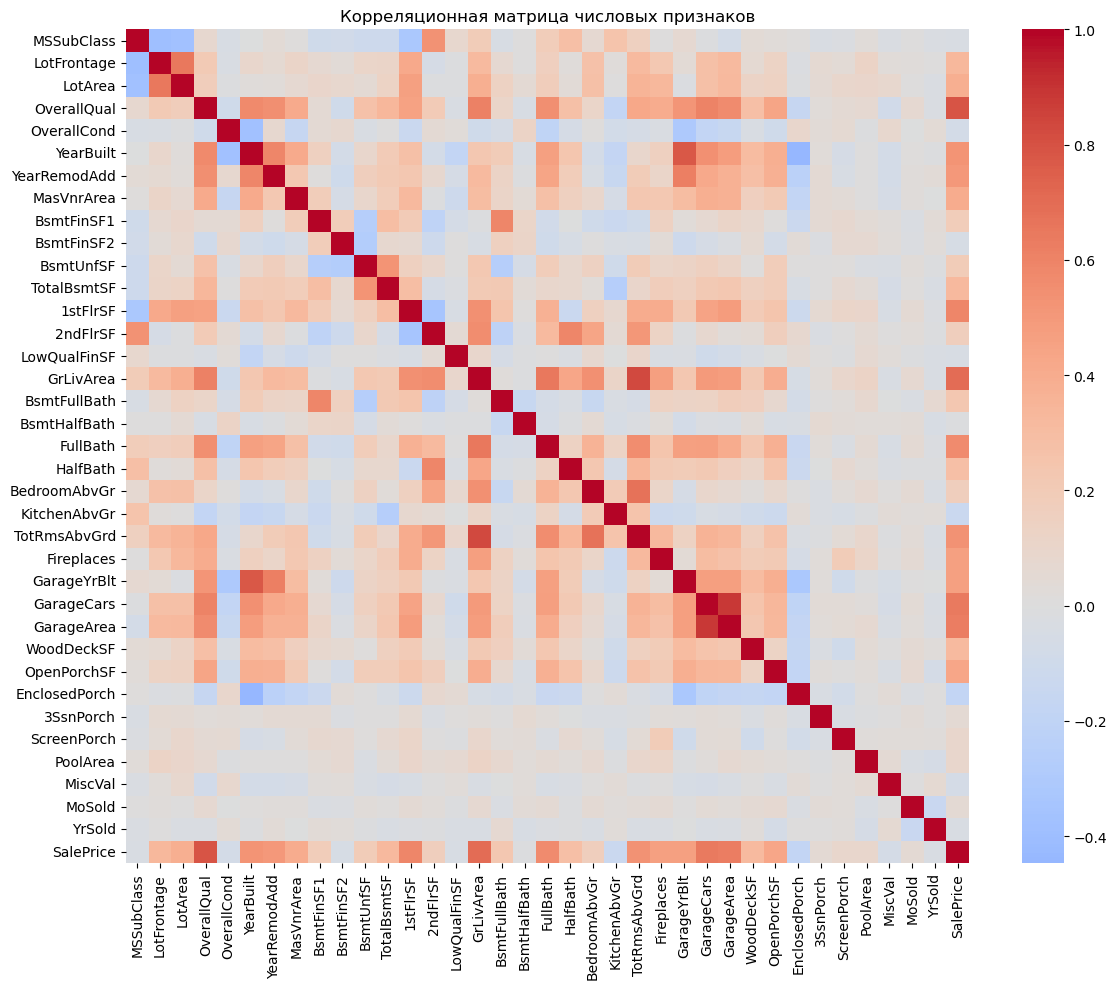

In [13]:
num_cols = data.select_dtypes(include='number').drop(columns=['Id'])
corr = num_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, fmt=".2f", annot=False)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()

- Вывод: сильная положительная корреляция SalePrice с `OverallQual` , `GrLivArea` , `GarageCars` и др.

**Самая сильная положительная корреляция с SalePrice прослеживается у:**

`OverallQual` (≈0.79) — качество материала и отделки,

`GrLivArea` (≈0.71) — жилая площадь,

`GarageCars` и `GarageArea` (≈0.64).

Эти признаки — очевидные первичные кандидаты для модели.

Категориальные признаки: []

--- Уникальные значения категориальных признаков ---


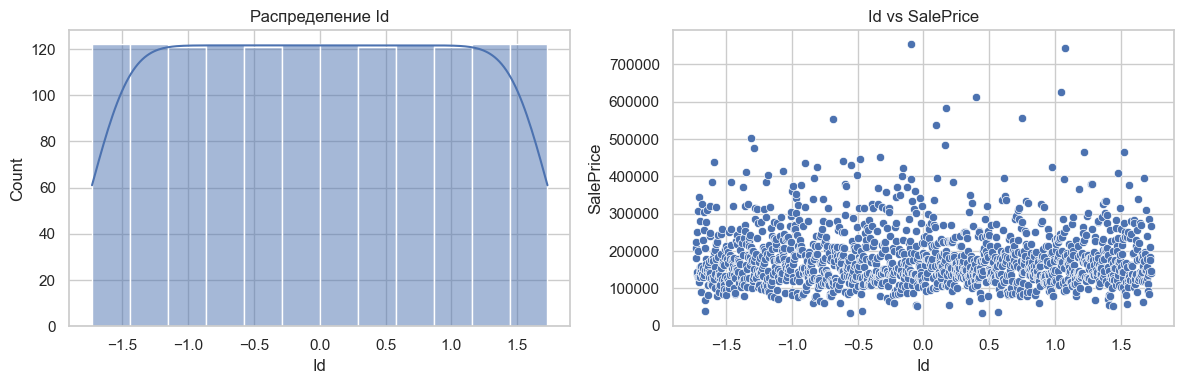

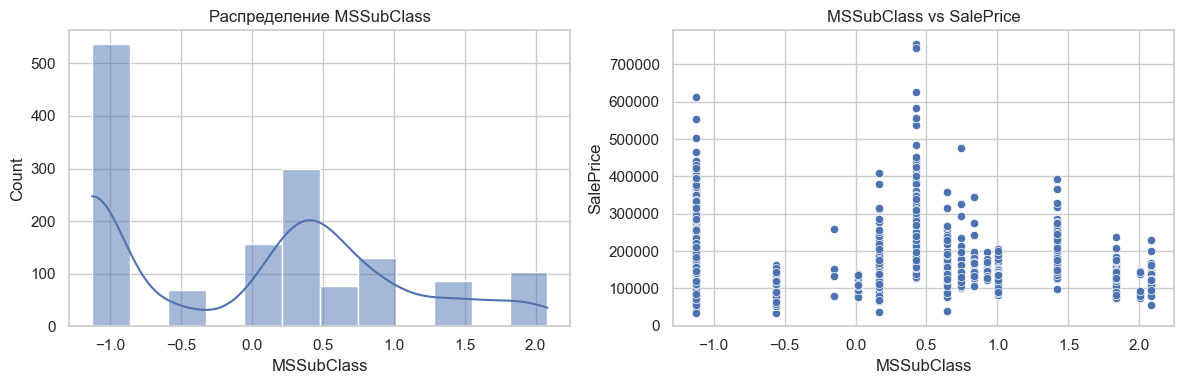

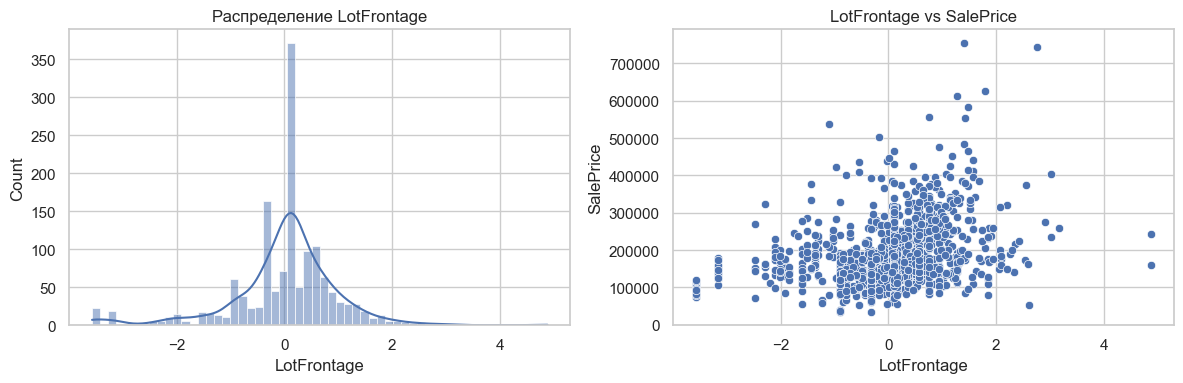

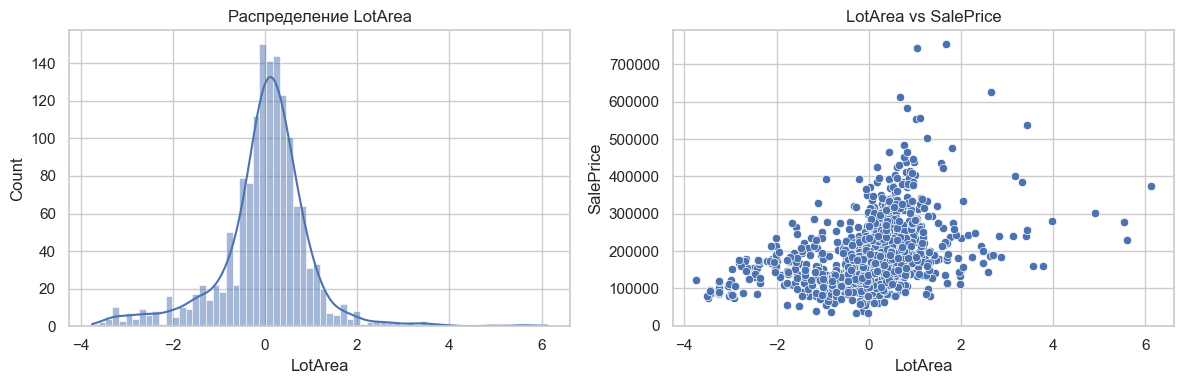

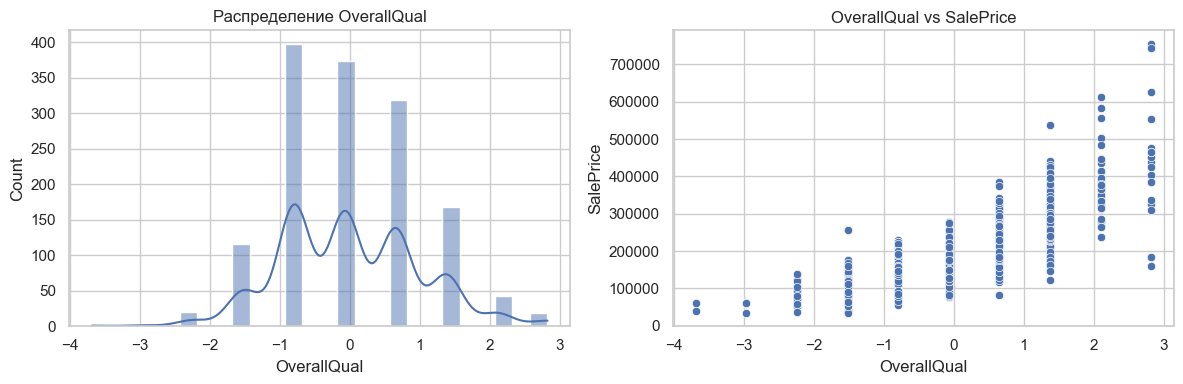

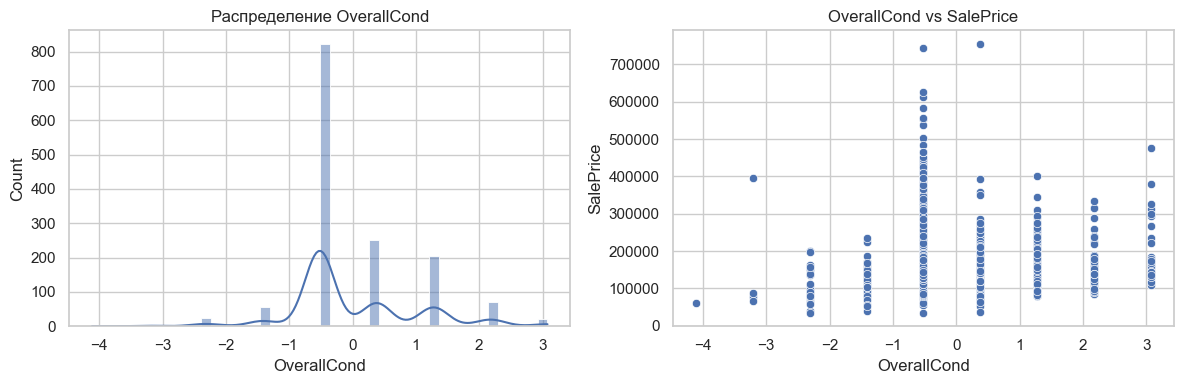

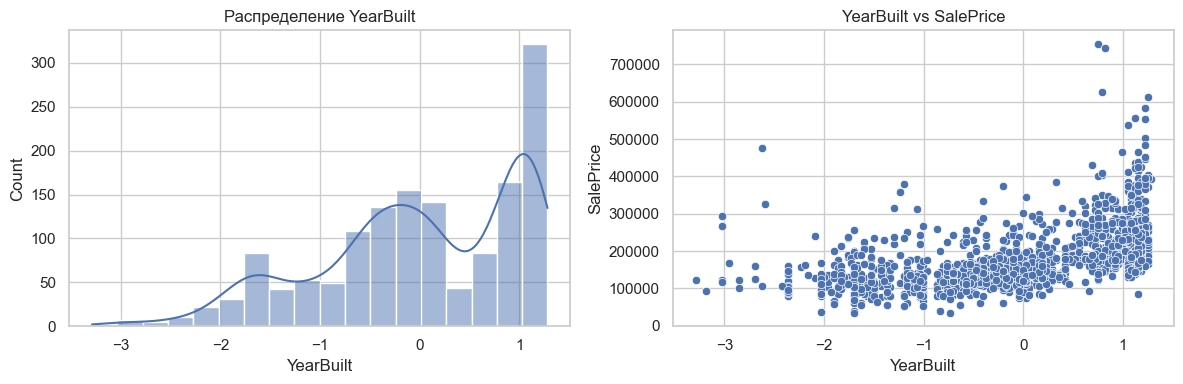

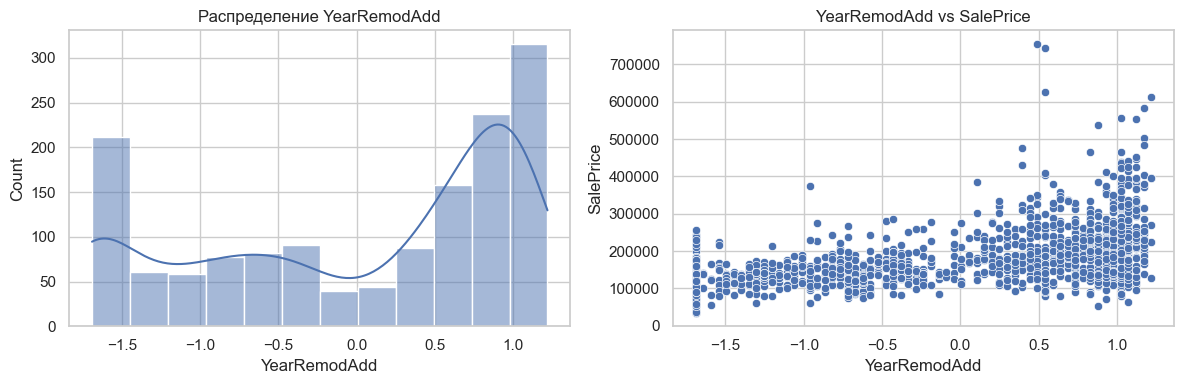

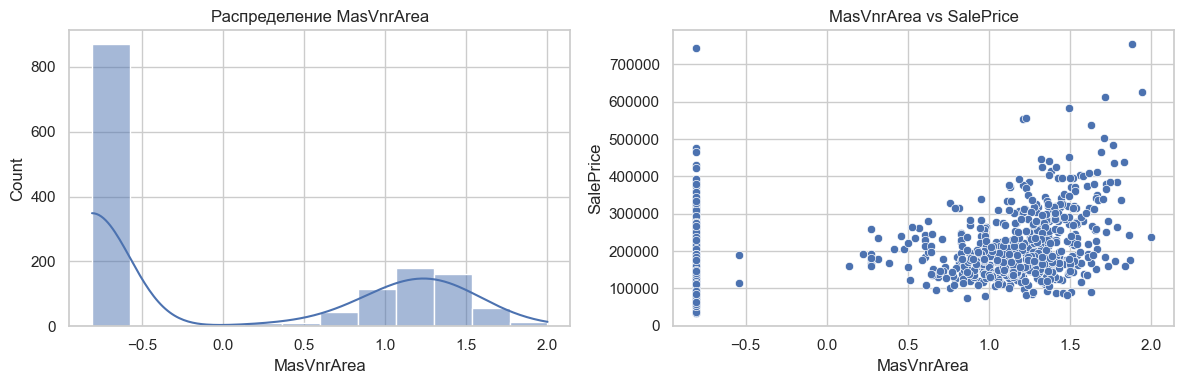

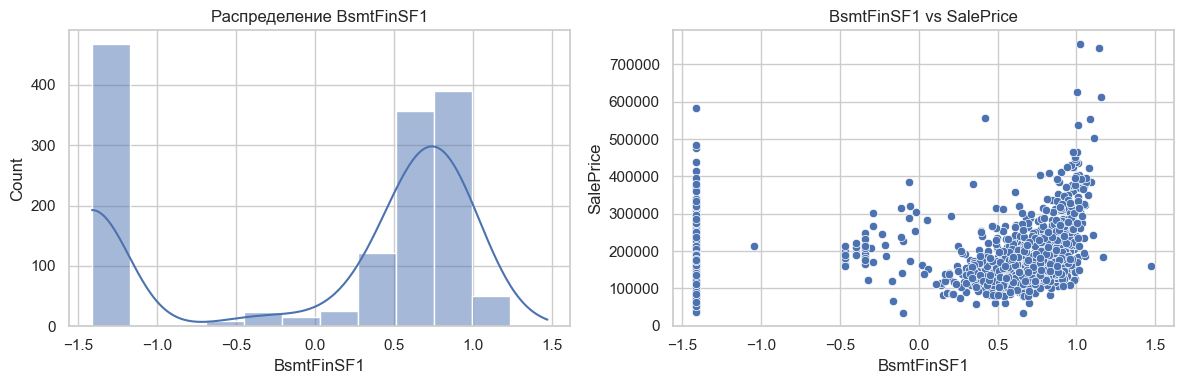

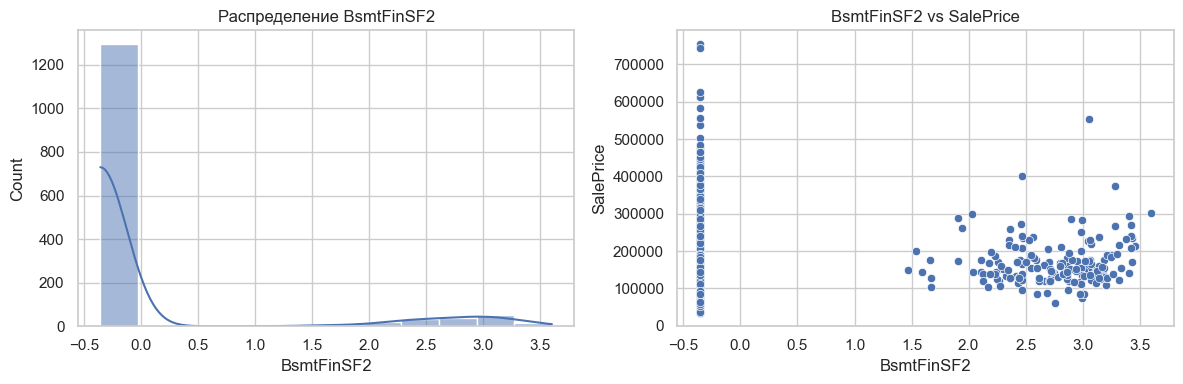

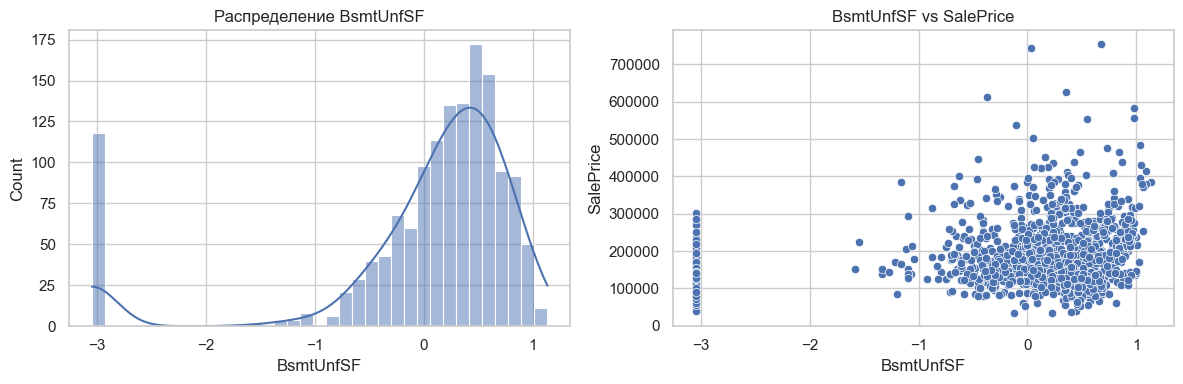

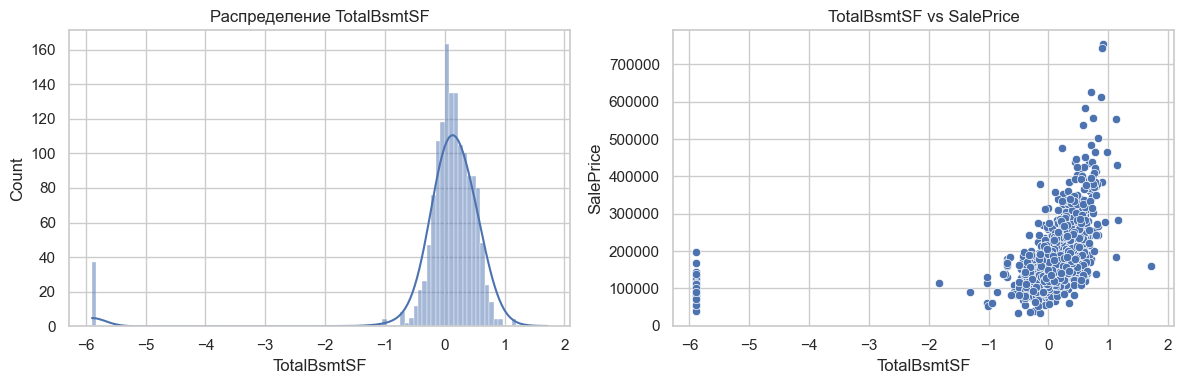

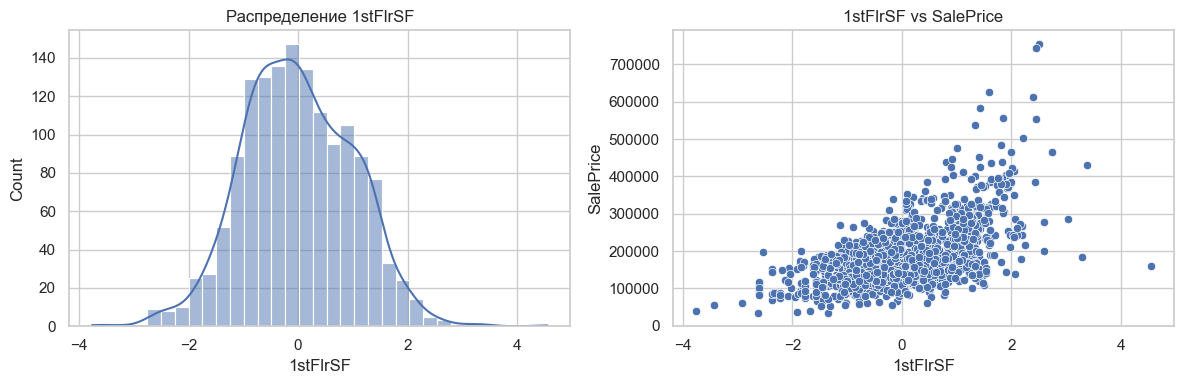

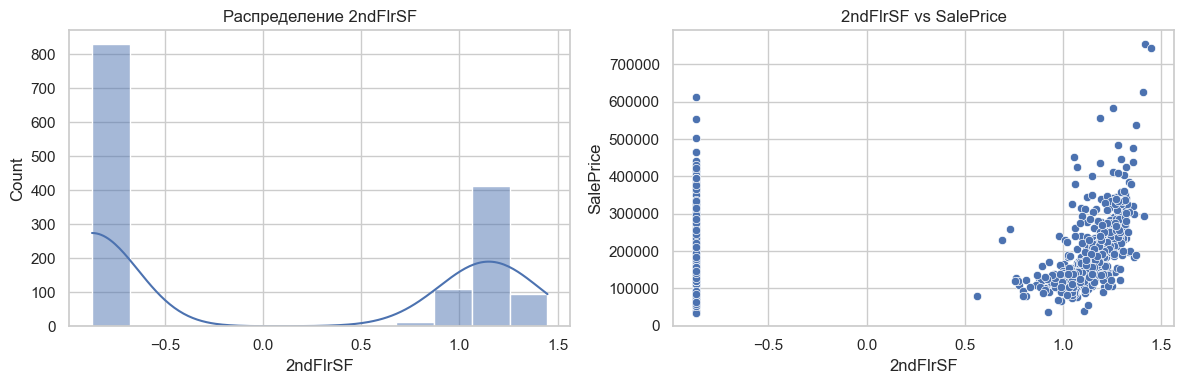

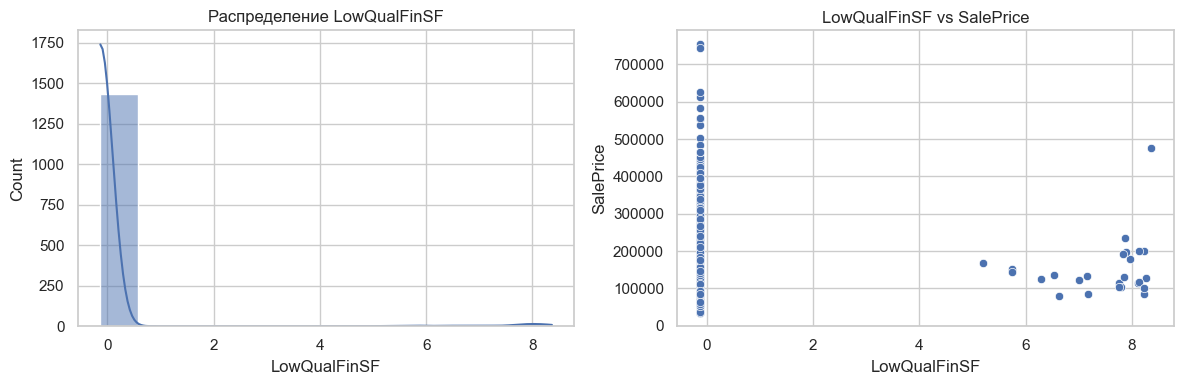

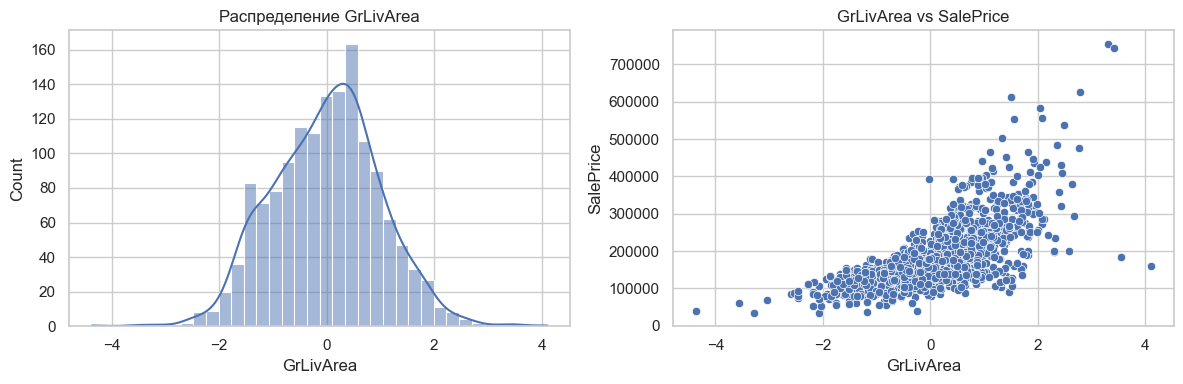

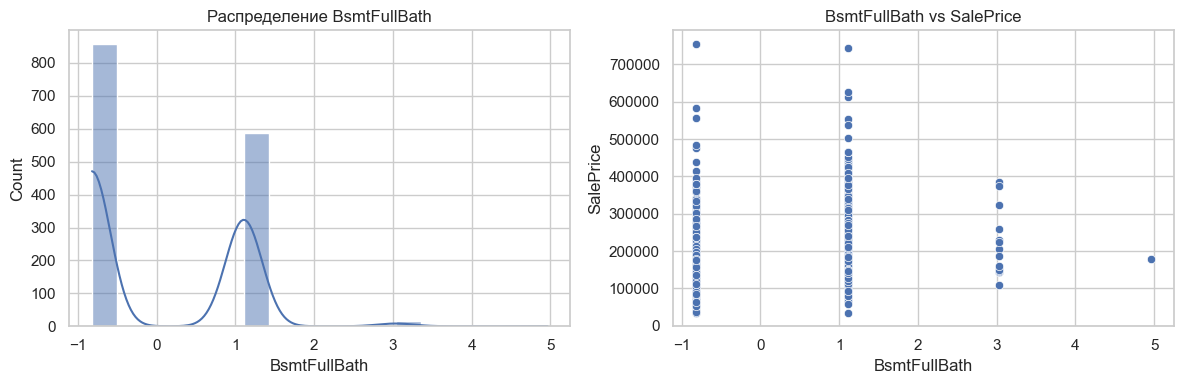

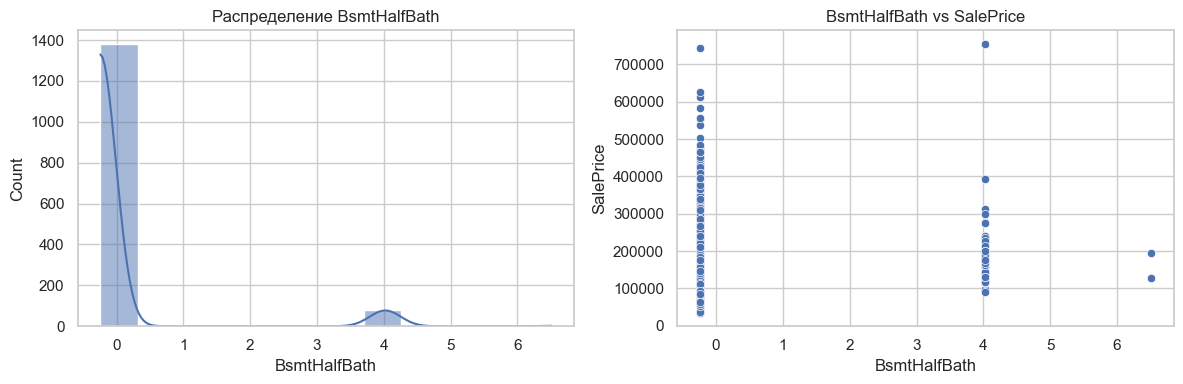

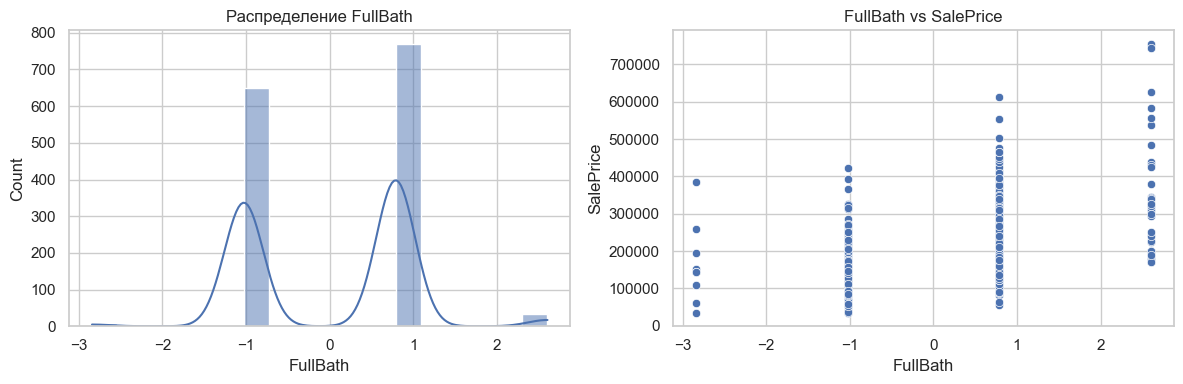

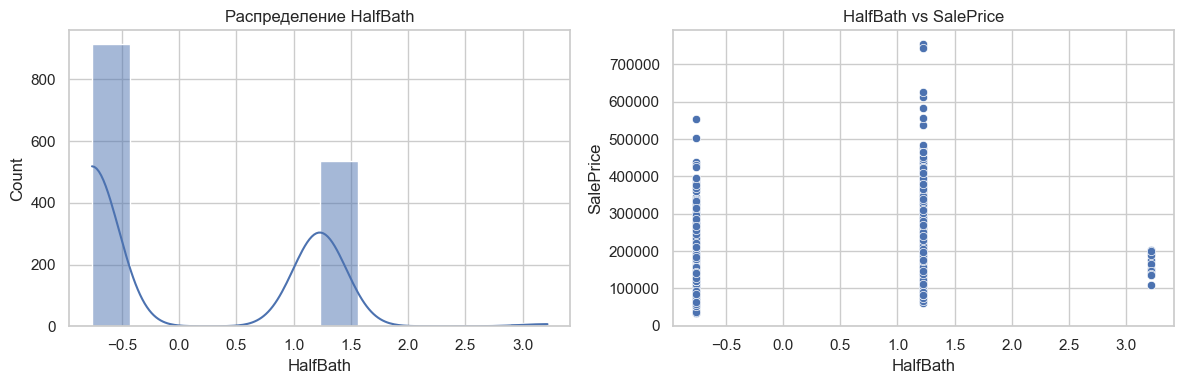

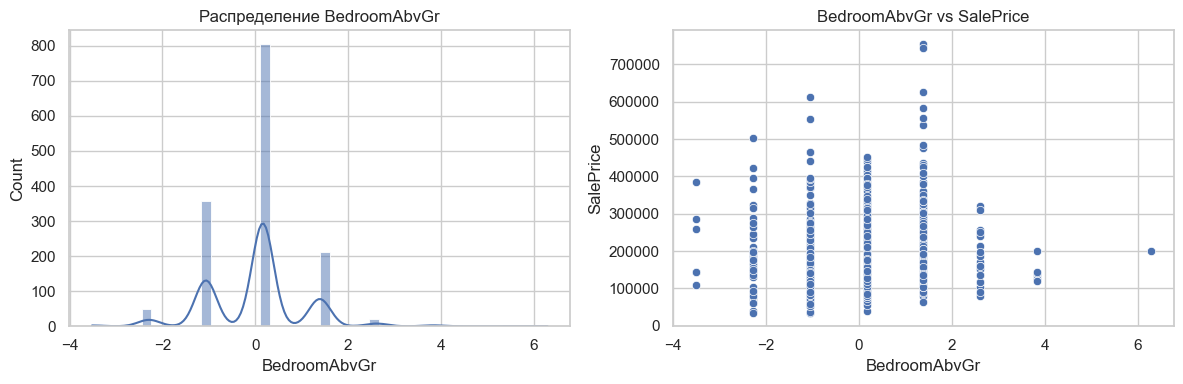

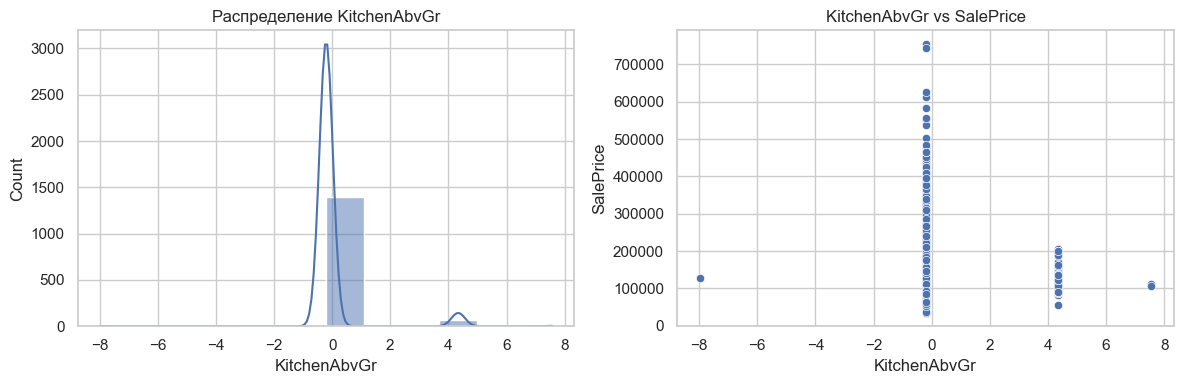

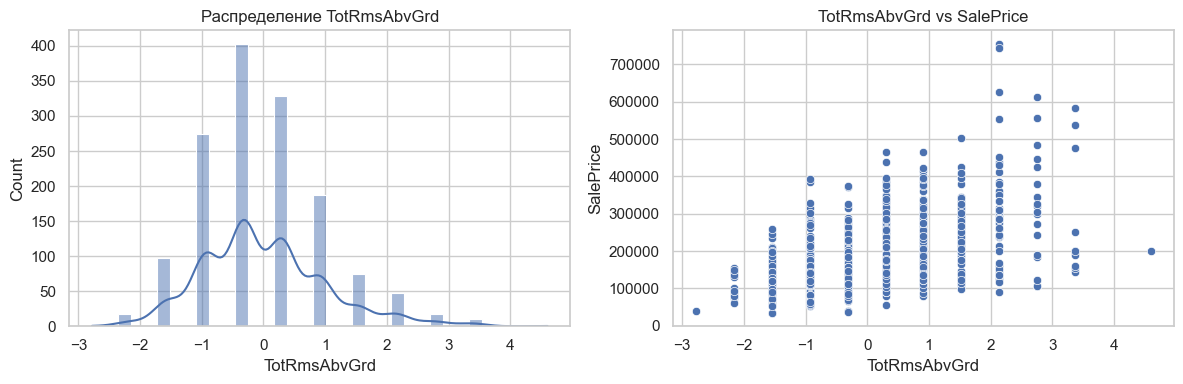

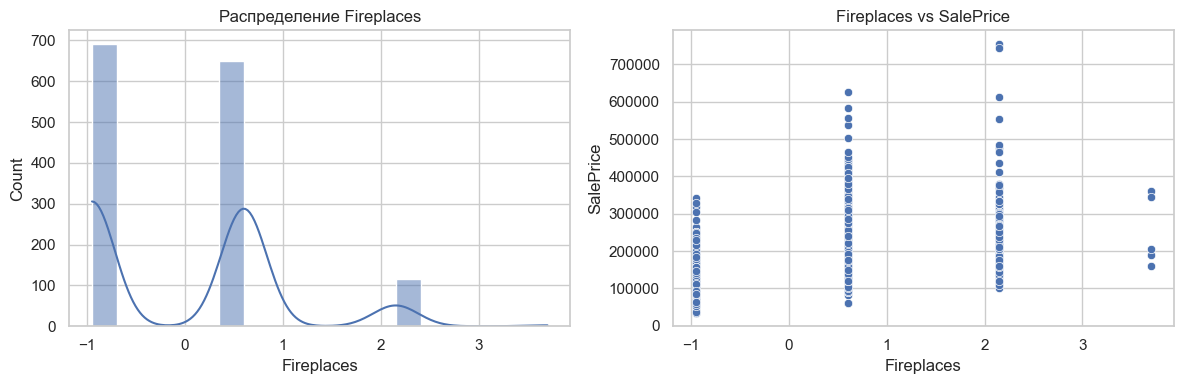

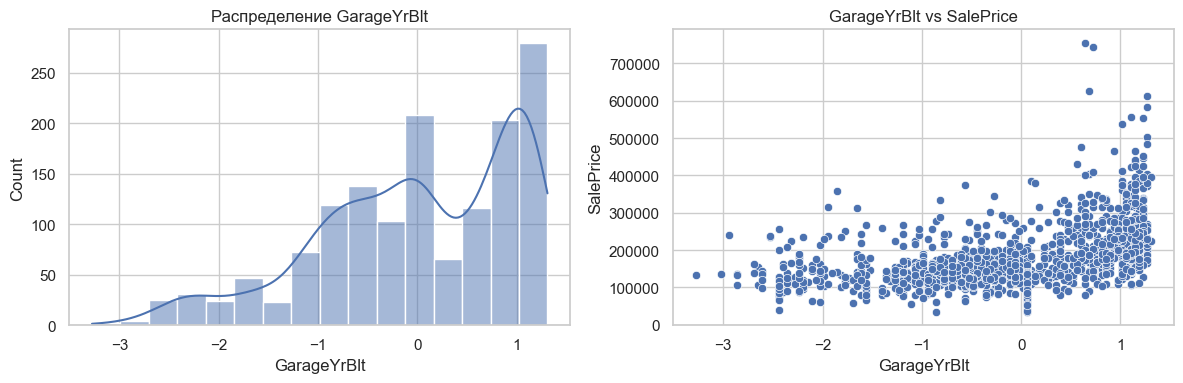

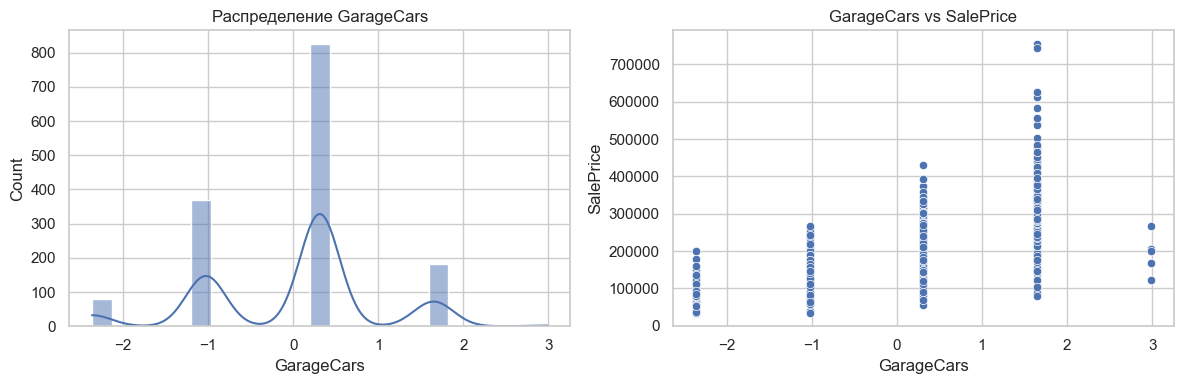

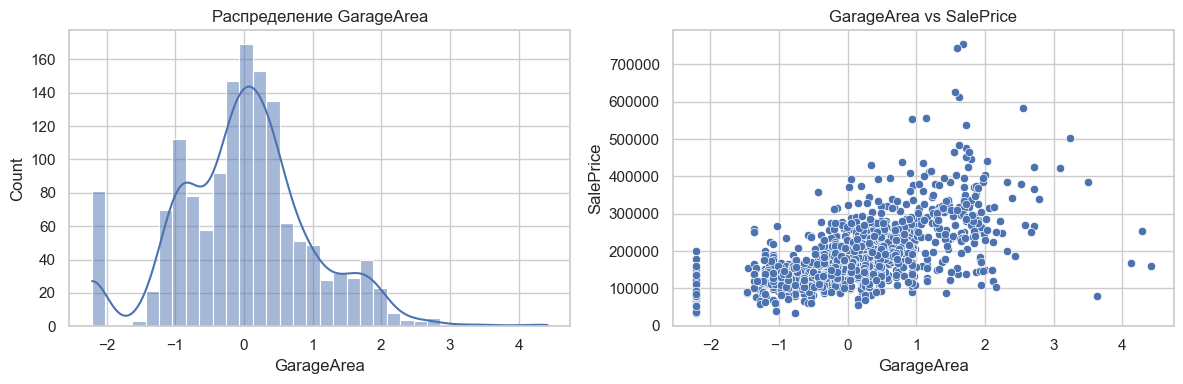

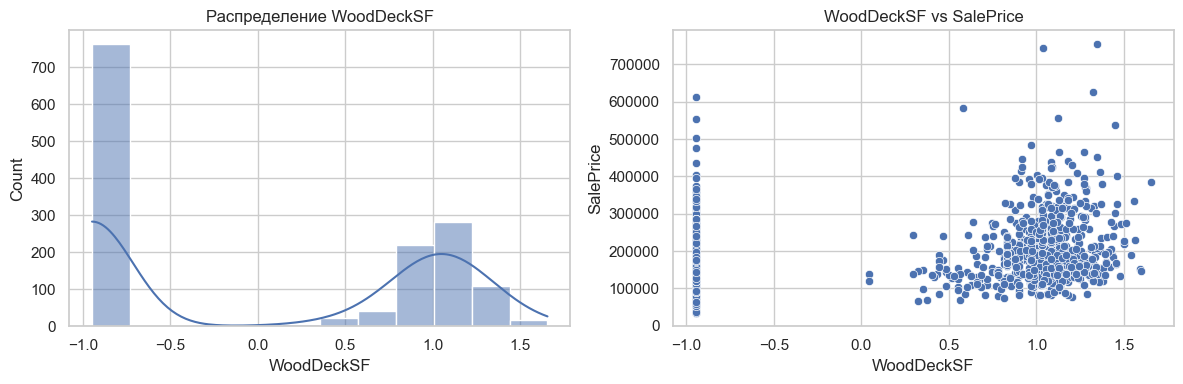

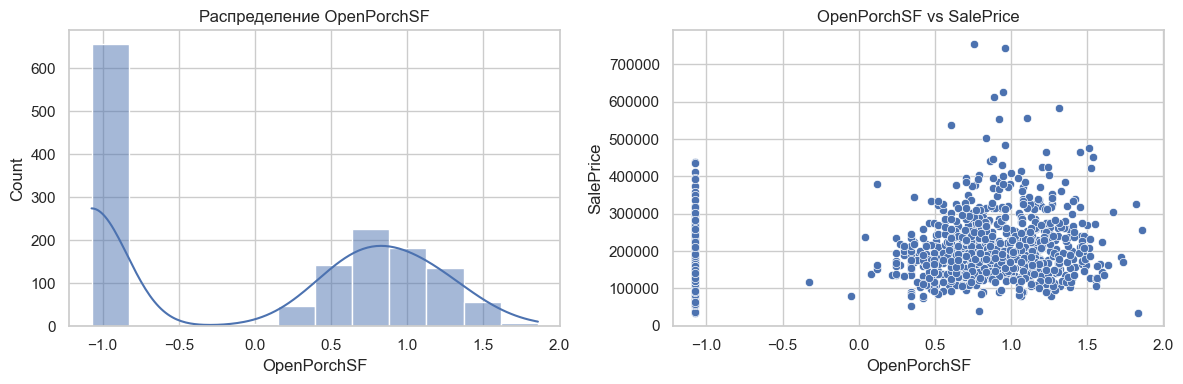

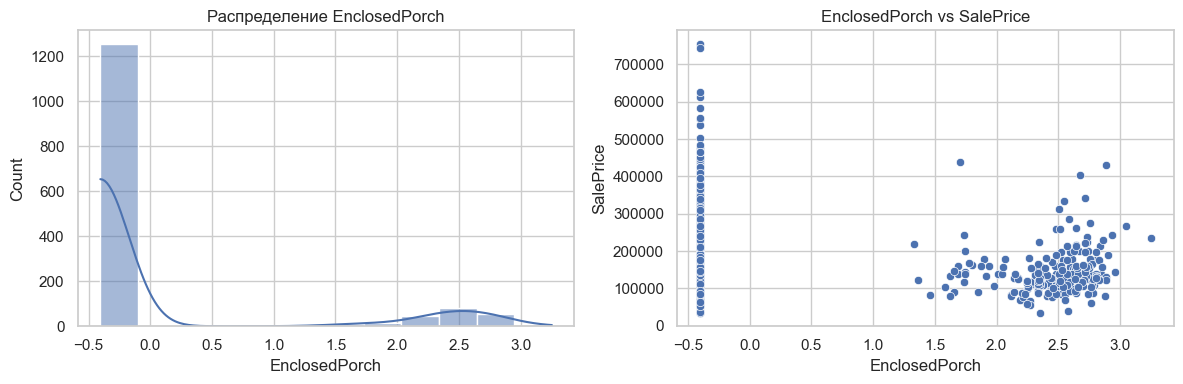

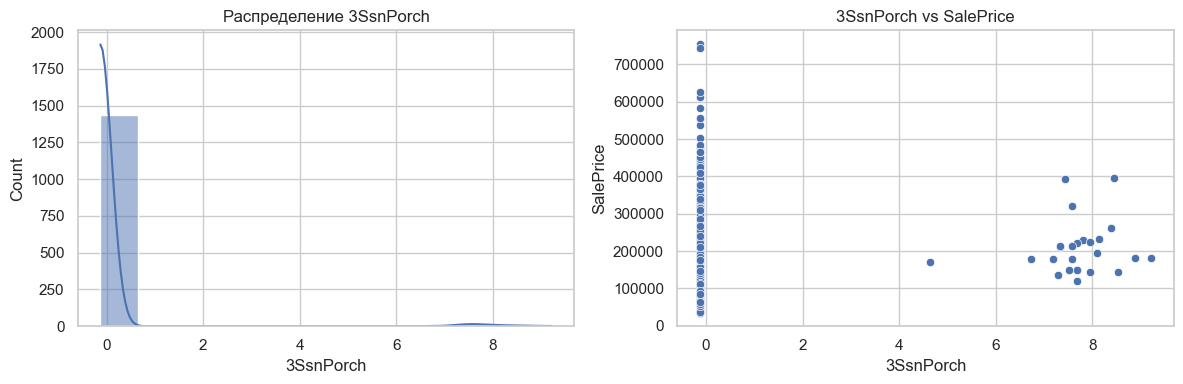

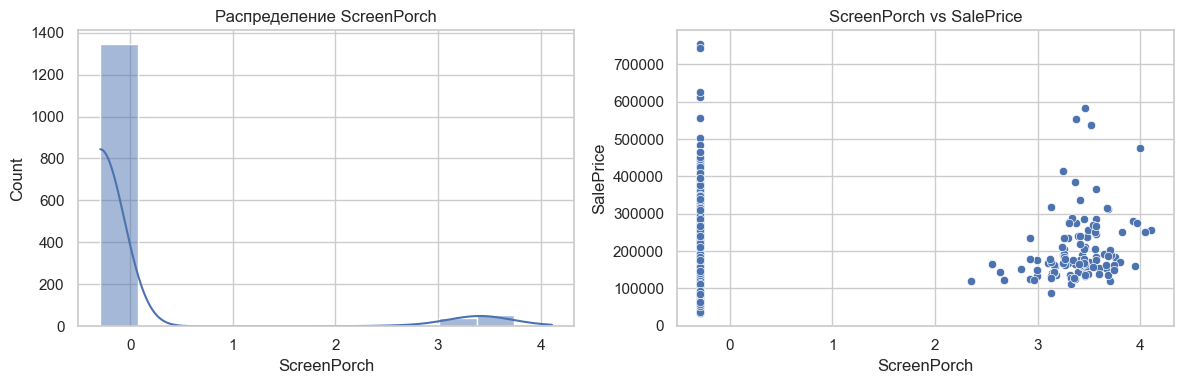

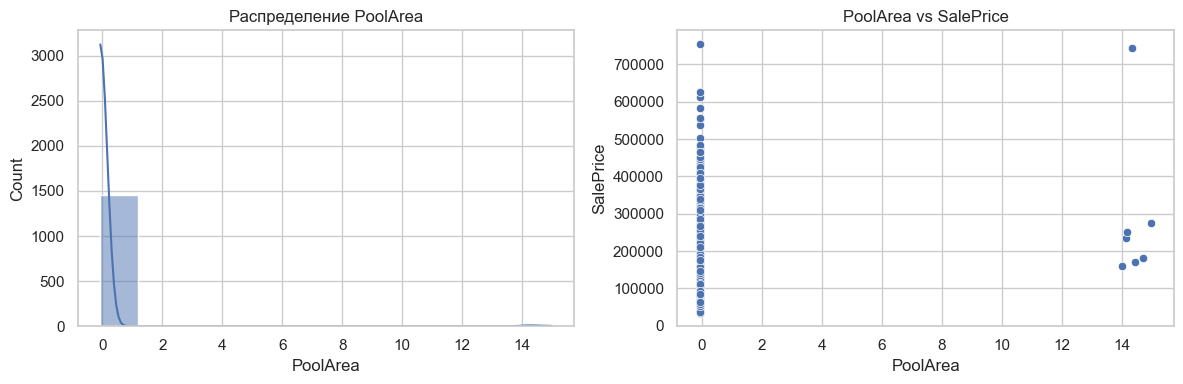

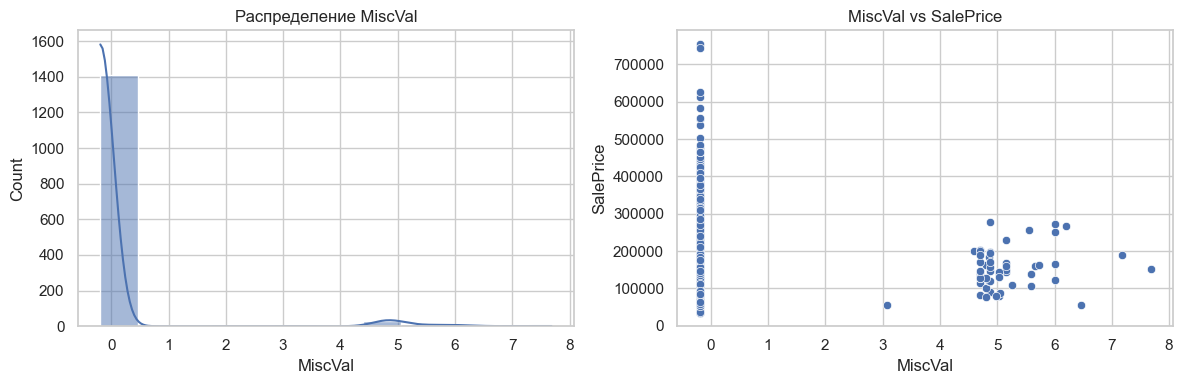

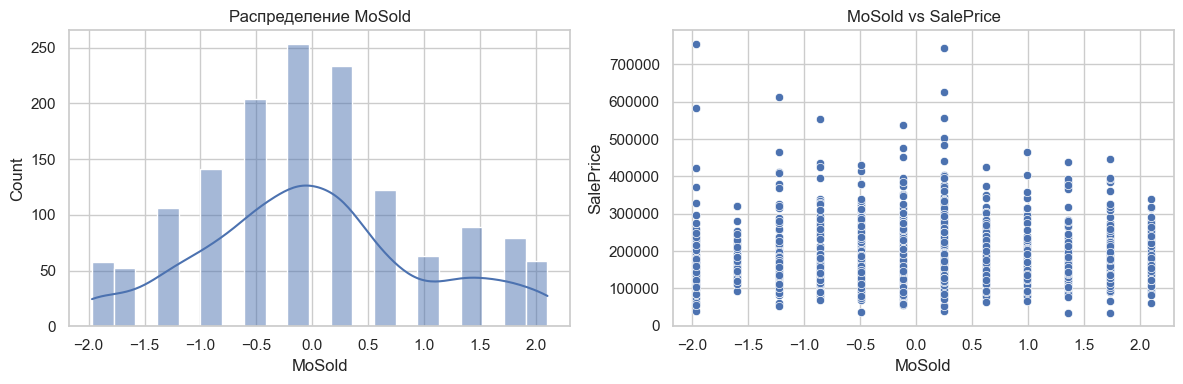

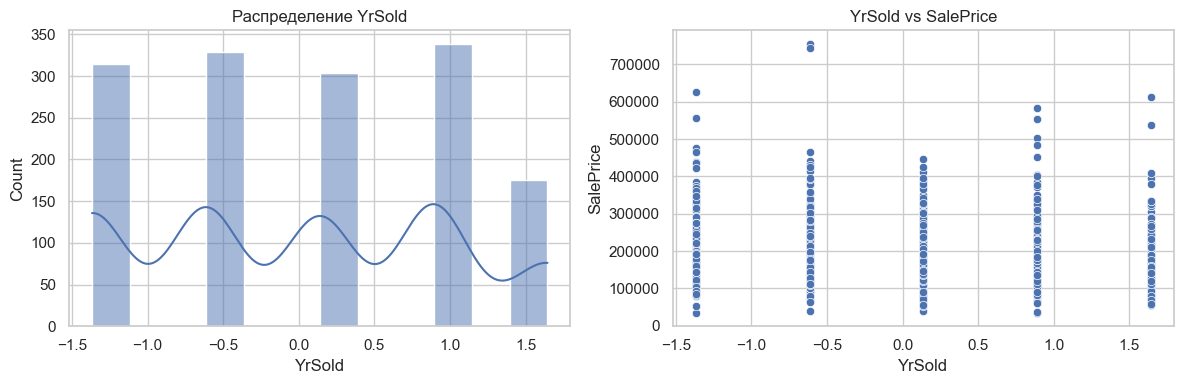

In [14]:
# Настройки
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Категориальные признаки
cat_cols = data.select_dtypes(include='object').columns
print("Категориальные признаки:", list(cat_cols))

# Покажем число уникальных значений
print("\n--- Уникальные значения категориальных признаков ---")
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} уникальных значений")

# Boxplot для категориальных с <20 уникальными
for col in cat_cols:
    if data[col].nunique() < 20:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=data, x=col, y='SalePrice')
        plt.xticks(rotation=45)
        plt.title(f"{col} vs SalePrice")
        plt.tight_layout()
        plt.show()

# Числовые признаки
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')

# Гистограмма + scatterplot для каждого числового признака
for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data[col].dropna(), kde=True, ax=axs[0])
    axs[0].set_title(f"Распределение {col}")
    
    sns.scatterplot(x=data[col], y=data['SalePrice'], ax=axs[1])
    axs[1].set_title(f"{col} vs SalePrice")
    
    plt.tight_layout()
    plt.show()

# Гистограмма SalePrice

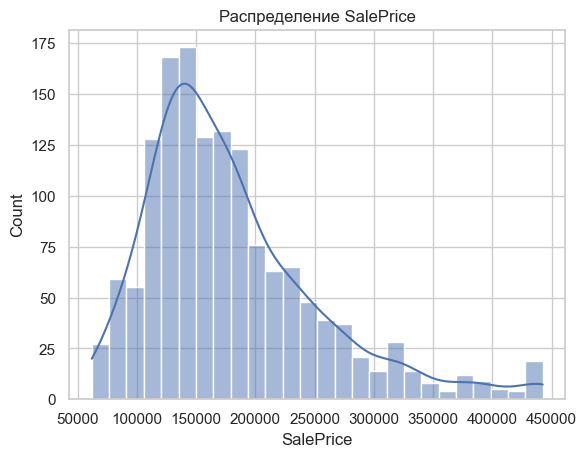

count      1460.000000
mean     179926.416233
std       74052.658892
min       61815.970000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      442567.010000
Name: SalePrice, dtype: float64

In [33]:
sns.histplot(data['SalePrice'], kde=True)
plt.title("Распределение SalePrice")
plt.show()

data['SalePrice'].describe()

 **Интерпретация:**
- Средняя цена (mean): ~$180,900.

- Медианная цена (50%): $163,000 — меньше среднего → распределение асимметрично вправо (есть дорогие дома).

- Стандартное отклонение (std): ~$79,400 — высокое, разброс цен значительный.

- Минимум / максимум: от $34,900  до  $755,000 — разброс почти в 22 раза, что говорит о наличии выбросов.

- 75% перцентиль (75%): $214,000 → 25% домов дороже этой суммы.

  **Выводы:**
- Распределение цен положительно скошено, что часто встречается в ценах на жильё.

## Сравнение гистограмм SalePrice до и после логорифмирования (log1p)

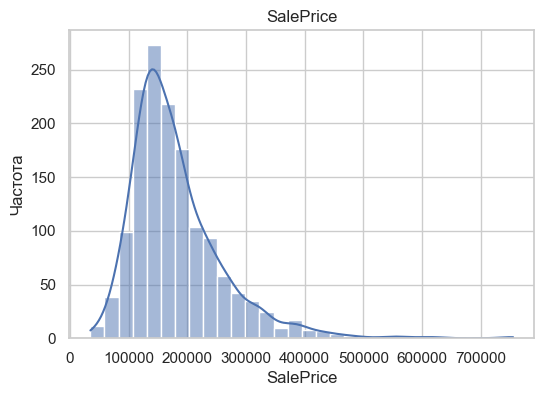

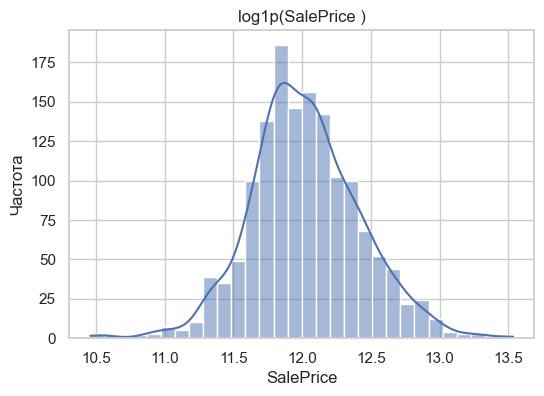

In [16]:
def plot_distribution(feature, data, log=False):
    x = np.log1p(data[feature]) if log else data[feature]
    plt.figure(figsize=(6,4))
    sns.histplot(x, kde=True, bins=30)
    plt.title(f'{"log1p(" if log else ""}{feature}{" )" if log else ""}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

# до и после лог-преобразования
plot_distribution('SalePrice', data, log=False)
plot_distribution('SalePrice', data, log=True)

- Распределение становится более симметричным, ближе к нормальному — хвост сглаживается.

- Большие выбросы «сжимаются» и уже не доминируют шкалу, так что большинство домов на гистограмме оказывается в более концентрированном диапазоне.

**Вывод:** для алгоритмов, предполагающих (или лучше работающих при) нормальности целевой переменной или от равномерного разброса (линейная регрессия, Lasso), гораздо логичнее обучать модель на log1p(SalePrice), а затем при необходимости обратным преобразованием получать прогнозы в исходных координатах.

# Constant & Quasiconstant

In [17]:
constant_cols = [col for col in data.columns 
                 if data[col].nunique() == 1]
print("Константные признаки:", constant_cols)

Константные признаки: []


In [18]:
threshold = 0.99
quasi_constant_cols = []

for col in data.columns:
    if data[col].nunique() > 1:
        top_freq = data[col].value_counts(normalize=True).iloc[0]
        if top_freq > threshold:
            quasi_constant_cols.append(col)

n_quasi = len(quasi_constant_cols)
print(f"Найдено квазиконстантных признаков (> {threshold*100:.0f}% одного уровня): {n_quasi}")

data.drop(columns=quasi_constant_cols, inplace=True)

print(f"Удалено квазиконстантных признаков: {n_quasi}")
print("Новая форма датасета:", data.shape)

Найдено квазиконстантных признаков (> 99% одного уровня): 70
Удалено квазиконстантных признаков: 70
Новая форма датасета: (1460, 179)


In [19]:
quasi_constant_cols

['PoolArea',
 'Street_Pave',
 'LotShape_IR3',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'ExterQual_Fa',
 'ExterCond_Po',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtCond_Po',
 'BsmtFinType2_GLQ',
 'H

# Удаляем переменные с большой корреляцией (>80%)

In [20]:
# Удаляем сильно коррелирующие признаки
threshold = 0.8
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print(f"Найдено сильно коррелирующих признаков (|corr| > {threshold}): {len(to_drop)}")

data.drop(columns=to_drop, inplace=True)

print(f"Удалено признаков: {len(to_drop)}")
print("Новая форма датасета:", data.shape)

Найдено сильно коррелирующих признаков (|corr| > 0.8): 27
Удалено признаков: 27
Новая форма датасета: (1460, 152)


In [21]:
num_features = data.select_dtypes(include=['int64', 'float64'])
print(num_features.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


# Таблица анализа признаков

In [22]:
print(data.columns.tolist())

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neigh

In [23]:
# Создаём сводную таблицу по каждому признаку
feature_summary = []

for col in data.columns:
    dtype = data[col].dtype
    n_missing = data[col].isnull().sum()
    n_unique = data[col].nunique()
    
    if dtype == 'object':
        corr = None  # нельзя посчитать напрямую
    else:
        if col != 'SalePrice':
            corr = data[[col, 'SalePrice']].corr().iloc[0, 1]
        else:
            corr = 1.0

    feature_summary.append({
        'feature': col,
        'dtype': dtype,
        'missing': n_missing,
        'n_unique': n_unique,
        'corr_with_SalePrice': corr
    })

feature_summary_data = pd.DataFrame(feature_summary)
feature_summary_data = feature_summary_data.sort_values(by='corr_with_SalePrice', ascending=False)

# Показываем
print("\n--- Сводная таблица по признакам ---")
display(feature_summary_data)


--- Сводная таблица по признакам ---


,feature,dtype,missing,n_unique,corr_with_SalePrice
34,SalePrice,int64,0,663,1.000000
4,OverallQual,float64,0,10,0.790982
16,GrLivArea,float64,0,861,0.695147
25,GarageCars,float64,0,5,0.640409
13,1stFlrSF,float64,0,753,0.591299
19,FullBath,float64,0,4,0.560664
6,YearBuilt,float64,0,112,0.522897
7,YearRemodAdd,float64,0,61,0.507101
100,Foundation_PConc,bool,0,2,0.497734
23,Fireplaces,float64,0,4,0.466929


### как читать таблицу:
- Пропуски (missing):

20% — либо удалять, либо аккуратно заполнять.

- Уникальные значения (n_unique):

1 — бесполезны, можно сразу удалять.

2-10 — хорошие кандидаты на one-hot.

больше 10 — подумать о target encoding / frequency encoding.

- Корреляция (corr_with_SalePrice):

больше 0.5 — сильная связь, важные признаки.

0.2–0.5 — умеренно полезны.

< 0.2 — слабая корреляция, но не всегда бесполезны.

In [24]:
# Находим признаки с корреляцией |r| ≤ 0.2 с SalePrice
low_corr_features = feature_summary_data[
    feature_summary_data['corr_with_SalePrice'].notnull() &
    feature_summary_data['corr_with_SalePrice'].abs().le(0.2)
]['feature'].tolist()

# Считаем, сколько признаков удаляется
n_low_corr = len([f for f in low_corr_features if f != 'SalePrice'])
print(f"Найдено признаков с |corr| ≤ 0.2: {n_low_corr}")

# Удаляем их из датафрейма
data.drop(columns=[f for f in low_corr_features if f != 'SalePrice'], inplace=True)

# Проверяем результат
print("Новая форма датасета:", data.shape)

Найдено признаков с |corr| ≤ 0.2: 102
Новая форма датасета: (1460, 50)


In [25]:
feature_summary_data = pd.DataFrame([
    {
        'feature': col,
        'dtype': data[col].dtype,
        'missing': data[col].isnull().sum(),
        'n_unique': data[col].nunique(),
        'corr_with_SalePrice': None if data[col].dtype == 'object' or col == 'SalePrice' else data[[col, 'SalePrice']].corr().iloc[0, 1],
        'drop_recommendation':
            'Drop - constant' if data[col].nunique() == 1 else
            'Drop - too many missing' if data[col].isnull().sum() / len(data) > 0.4 else
            'Keep - high correlation' if data[col].dtype != 'object' and col != 'SalePrice' and data[[col, 'SalePrice']].corr().iloc[0, 1] > 0.5 else
            'Consider'  # всё остальное
    }
    for col in data.columns
]).sort_values(by='corr_with_SalePrice', ascending=False)

In [26]:
display(feature_summary_data)

,feature,dtype,missing,n_unique,corr_with_SalePrice,drop_recommendation
2,OverallQual,float64,0,10,0.790982,Keep - high correlation
8,GrLivArea,float64,0,861,0.695147,Keep - high correlation
14,GarageCars,float64,0,5,0.640409,Keep - high correlation
7,1stFlrSF,float64,0,753,0.591299,Keep - high correlation
10,FullBath,float64,0,4,0.560664,Keep - high correlation
3,YearBuilt,float64,0,112,0.522897,Keep - high correlation
4,YearRemodAdd,float64,0,61,0.507101,Keep - high correlation
29,Foundation_PConc,bool,0,2,0.497734,Consider
12,Fireplaces,float64,0,4,0.466929,Consider
13,GarageYrBlt,float64,0,97,0.466754,Consider


### Инструкции рекомендаций:

| Условие            | Рекомендация         |
| ------------------ | -------------------- |
| `n_unique == 1`    | Drop — бесполезный   |
| `> 40% пропусков`  | Drop — слишком много |
| `корреляция > 0.5` | Keep — сильно влияет |
| всё остальное      | Consider — надо думать   |


In [27]:
data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_RL,LotShape_Reg,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,HouseStyle_2Story,RoofStyle_Gable,Exterior1st_VinylSd,MasVnrType_Stone,ExterQual_Gd,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,FireplaceQu_Gd,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD
0,-0.078896,-0.133270,0.651479,1.050994,0.878668,1.203619,0.002513,-0.803645,0.529194,1.107810,0.789741,1.227585,-0.951226,1.017598,0.311725,-0.946701,0.845209,208500,True,True,False,False,False,True,True,True,False,True,False,True,True,False,False,True,True,False,True,True,True,False,True,False,False,False,False,True,True,True,False,True
1,0.572719,0.113413,-0.071836,0.156734,-0.429577,-0.806841,0.341114,0.418479,-0.381965,-0.819964,0.789741,-0.761621,0.600495,-0.107927,0.311725,1.249540,-1.072916,181500,True,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,True,True,False,True
2,0.062541,0.420049,0.651479,0.984752,0.830215,1.131524,0.065397,-0.576677,0.659631,1.107810,0.789741,1.227585,0.600495,0.934226,0.311725,-0.946701,0.675137,223500,True,False,False,False,False,True,True,True,False,True,False,True,True,False,False,False,True,False,True,True,True,False,True,False,False,False,False,True,True,True,False,True
3,-0.329561,0.103317,0.651479,-1.863632,-0.720298,-0.806841,-0.105819,-0.439421,0.541448,1.107810,-1.026041,-0.761621,0.600495,0.809167,1.650307,-0.946701,0.592558,140000,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,True,True,True,True,False,False,True,False,True,True,True,True,False,True
4,0.726089,0.878431,1.374795,0.951632,0.733308,1.423411,0.256237,0.112127,1.282295,1.107810,0.789741,1.227585,0.600495,0.892540,1.650307,1.080884,0.991848,250000,True,False,True,False,False,True,True,True,False,True,False,True,True,False,False,False,True,False,True,True,True,False,True,False,False,False,False,True,True,True,False,True


In [28]:
data.shape

(1460, 50)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1460 non-null   float64
 1   LotArea               1460 non-null   float64
 2   OverallQual           1460 non-null   float64
 3   YearBuilt             1460 non-null   float64
 4   YearRemodAdd          1460 non-null   float64
 5   MasVnrArea            1460 non-null   float64
 6   TotalBsmtSF           1460 non-null   float64
 7   1stFlrSF              1460 non-null   float64
 8   GrLivArea             1460 non-null   float64
 9   BsmtFullBath          1460 non-null   float64
 10  FullBath              1460 non-null   float64
 11  HalfBath              1460 non-null   float64
 12  Fireplaces            1460 non-null   float64
 13  GarageYrBlt           1460 non-null   float64
 14  GarageCars            1460 non-null   float64
 15  WoodDeckSF           

# стоит подумать над объединением близких по смыслу переменных в одну, тем самым мы сможем снизить шум, уменьшить размер датасета, но если решим объеденить переменные, то обязательно нужно будет проверить производительность до объединения и после, после чего уже принимать решение, какой вариант будет лучше, так же надо подумать над выбросами и их обработкой либо же их удаление.

         feature  outliers_count  outliers_pct
0        LotArea             132      9.041096
1    LotFrontage             123      8.424658
2    TotalBsmtSF              52      3.561644
3      GrLivArea              10      0.684932
4      YearBuilt               9      0.616438
5       1stFlrSF               7      0.479452
6     Fireplaces               5      0.342466
7     GarageCars               5      0.342466
8    OverallQual               2      0.136986
9    GarageYrBlt               1      0.068493
10  BsmtFullBath               1      0.068493
11    MasVnrArea               0      0.000000
12  YearRemodAdd               0      0.000000
13      HalfBath               0      0.000000
14      FullBath               0      0.000000
15    WoodDeckSF               0      0.000000
16   OpenPorchSF               0      0.000000


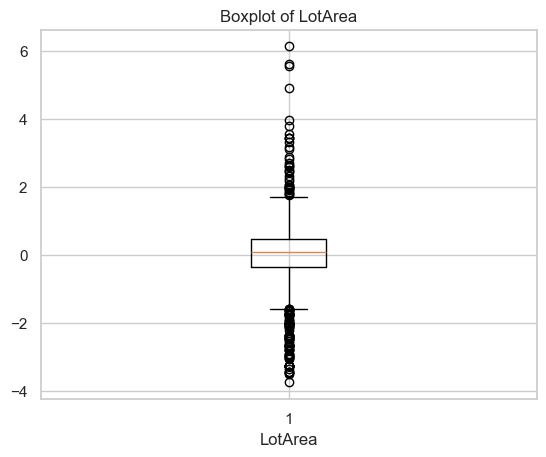

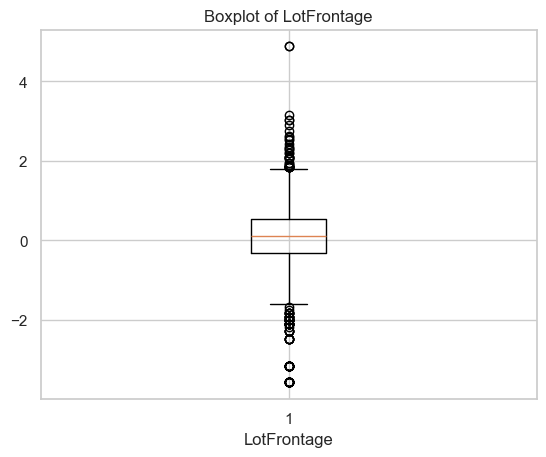

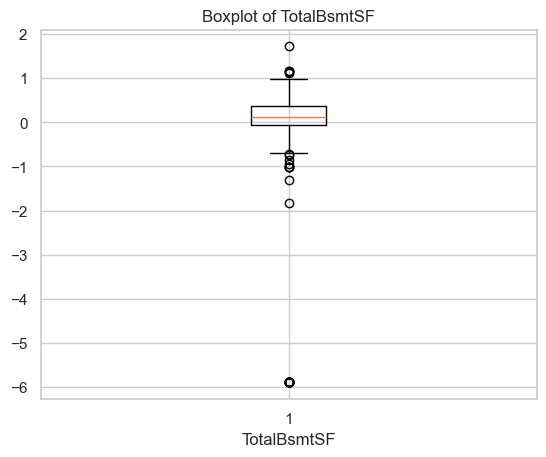

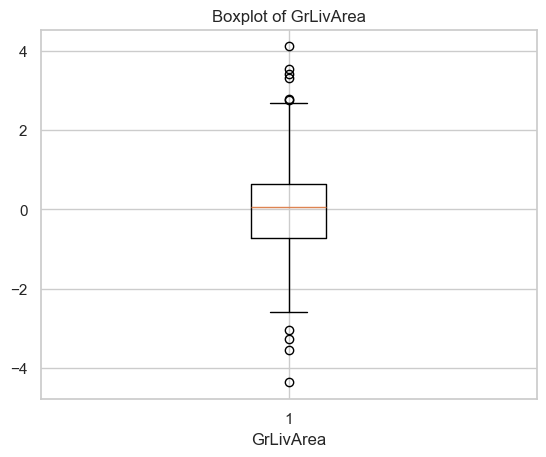

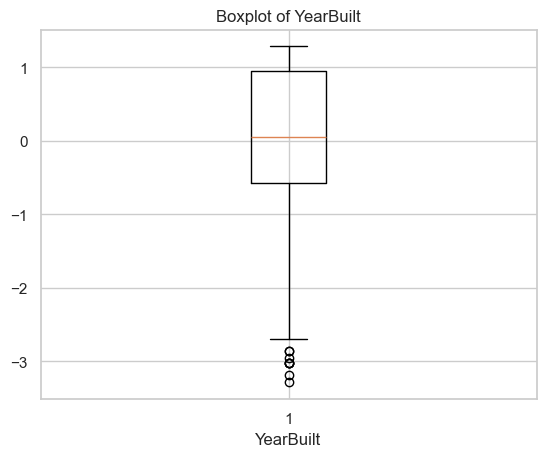

In [30]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('SalePrice', errors='ignore')

outlier_summary = []
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask = (data[col] < lower) | (data[col] > upper)
    count = mask.sum()
    pct = count / len(data) * 100
    
    outlier_summary.append({
        'feature': col,
        'outliers_count': count,
        'outliers_pct': pct
    })

outlier_df = pd.DataFrame(outlier_summary) \
               .sort_values(by='outliers_pct', ascending=False) \
               .reset_index(drop=True)

print(outlier_df)

for col in outlier_df['feature'].head(5):
    plt.figure()
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

- `LotArea` (≈9 %) и `LotFrontage` (≈8,4 %) — сильно скошены из-за редких очень больших участков. Рекомендую лог- или Box–Cox-трансформацию либо обрезать верхние 1–2 % (Winsorize - удаление самый маленьких и самых больших выбросов по заданным границам).

- `TotalBsmtSF` (≈3,6 %) — единичные «мегарайоны» подвала. Можно попробовать применить логарифмирование.

- `GrLivArea` (≈0,7 %) и `1stFlrSF` (≈0,48 %) — крупные жилые площади встречаются редко, но несут ценную информацию. Можно оставить как есть или слегка смягчить логарифмом.

- `YearBuilt` (≈0,6 %) и `GarageYrBlt` (≈0,07 %) — очень старые/нестандартные года лучше перевести в «возраст» (`YrSold` – `YearBuilt`) и потом, при необходимости, Winsorize по возрасту.

- Все остальные признаки имеют выбросы < 0,4 % и чаще отражают редкие, но валидные категории (`Fireplaces` , `GarageCars` и т.д.), их можно либо объеденить, либо оставить без изменений.

In [31]:
# 1) Детекция выбросов
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('SalePrice', errors='ignore')
outlier_summary = []
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count_lower = (data[col] < lower).sum()
    count_upper = (data[col] > upper).sum()
    outlier_summary.append((col, count_lower + count_upper))
outlier_df = pd.DataFrame(outlier_summary, columns=['feature', 'outliers'])
print("Summary of outliers per feature:\n", outlier_df.sort_values(by='outliers', ascending=False))

# 2) Обработка выбросов: обрезаем на 1-м и 99-м процентилях для сильно смещенных признаков
for col in ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']:
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower, upper)

# 3) Дополнительно: лог-преобразование для оставшихся скошенных признаков
skewness = data[numeric_cols].skew().sort_values(ascending=False)
skewed_feats = skewness[skewness > 1].index.tolist()
for feat in skewed_feats:
    data[feat] = np.log1p(data[feat])

Summary of outliers per feature:
          feature  outliers
1        LotArea       132
0    LotFrontage       123
6    TotalBsmtSF        52
8      GrLivArea        10
3      YearBuilt         9
7       1stFlrSF         7
12    Fireplaces         5
14    GarageCars         5
2    OverallQual         2
13   GarageYrBlt         1
9   BsmtFullBath         1
5     MasVnrArea         0
4   YearRemodAdd         0
11      HalfBath         0
10      FullBath         0
15    WoodDeckSF         0
16   OpenPorchSF         0


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, ConfusionMatrixDisplay
)

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# 2. Preprocessor

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',   StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 3. Pipelines и гиперпараметры
models = {
    'Logistic Regression': Pipeline([('preprocessor', preprocessor),
                                     ('clf', LogisticRegression(random_state=0))]),
    'Random Forest':       Pipeline([('preprocessor', preprocessor),
                                     ('clf', RandomForestClassifier(random_state=0))]),
    'SVC':                 Pipeline([('preprocessor', preprocessor),
                                     ('clf', SVC(probability=True, random_state=0))]),
    'KNN':                 Pipeline([('preprocessor', preprocessor),
                                     ('clf', KNeighborsClassifier())]),
    'Decision Tree':       Pipeline([('preprocessor', preprocessor),
                                     ('clf', DecisionTreeClassifier(random_state=0))]),
    'Gradient Boosting':   Pipeline([('preprocessor', preprocessor),
                                     ('clf', GradientBoostingClassifier(random_state=0))]),
    'XGBoost':             Pipeline([('preprocessor', preprocessor),
                                     ('clf', XGBClassifier(eval_metric='logloss', random_state=0))]),
    'Naive Bayes':         Pipeline([('preprocessor', preprocessor),
                                     ('clf', GaussianNB())])
}

param_grids = {
    'Logistic Regression': {
        'clf__C':       [0.1, 1, 10],
        'clf__penalty': ['l2'],
        'clf__solver':  ['lbfgs']
    },
    'Random Forest': {
        'clf__n_estimators': [50, 100],
        'clf__max_depth':    [5, 10]
    },
    'SVC': {
        'clf__C':     [0.1, 1, 10],
        'clf__gamma': [0.01, 0.1, 1]
    },
    'KNN': {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights':     ['uniform', 'distance']
    },
    'Decision Tree': {
        'clf__max_depth':       [3, 5, 10],
        'clf__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'clf__n_estimators':   [50, 100],
        'clf__learning_rate':  [0.01, 0.1],
        'clf__max_depth':      [3, 5]
    },
    'XGBoost': {
        'clf__n_estimators':   [50, 100],
        'clf__learning_rate':  [0.01, 0.1],
        'clf__max_depth':      [3, 5]
    },
    'Naive Bayes': {}
}

# 4. Подбор и сбор метрик
cv = KFold(n_splits=5, shuffle=True, random_state=0)
train_metrics = {m: {} for m in models}
test_metrics  = {m: {} for m in models}
best_models   = {}

for name, pipe in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(pipe, param_grids[name], cv=cv, n_jobs=-1)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    best_models[name] = best

    # прогнозы
    y_tr_pred = best.predict(X_train)
    y_te_pred = best.predict(X_test)
    y_te_prob = best.predict_proba(X_test)[:,1]

    # метрики
    for ds, y_true, y_pred, y_prob in [
        ('train', y_train, y_tr_pred, best.predict_proba(X_train)[:,1]),
        ('test',  y_test,  y_te_pred, y_te_prob)
    ]:
        m = {}
        m['accuracy']  = accuracy_score(y_true, y_pred)
        m['precision'] = precision_score(y_true, y_pred)
        m['recall']    = recall_score(y_true, y_pred)
        m['f1']        = f1_score(y_true, y_pred)
        m['roc_auc']   = roc_auc_score(y_true, y_prob)
        if ds == 'train':
            train_metrics[name] = m
        else:
            test_metrics[name]  = m

    print(f" → best params: {grid.best_params_}")
    print(f"    Test ACC={test_metrics[name]['accuracy']:.3f}, "
          f"ROC AUC={test_metrics[name]['roc_auc']:.3f}")

# 5. Функция для отрисовки
def plot_metrics(metrics_dict, title):
    names = list(metrics_dict.keys())
    acc   = [metrics_dict[n]['accuracy']  for n in names]
    prec  = [metrics_dict[n]['precision'] for n in names]
    rec   = [metrics_dict[n]['recall']    for n in names]
    f1    = [metrics_dict[n]['f1']        for n in names]
    roc   = [metrics_dict[n]['roc_auc']   for n in names]

    arrays = [acc, prec, rec, f1, roc]
    labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
    
    fig, axes = plt.subplots(2, 3, figsize=(18,10))
    axes = axes.flatten()
    
    for i, (vals, lbl) in enumerate(zip(arrays, labels)):
        ax = axes[i]
        order = np.argsort(-np.array(vals))
        ax.barh([names[j] for j in order], np.array(vals)[order])
        ax.set_title(lbl)
        ax.set_xlim(0,1)
        ax.invert_yaxis()
        for k, v in enumerate(np.array(vals)[order]):
            ax.text(v + 0.01, k, f"{v:.2f}", va='center')
        ax.grid(True)
    
    fig.delaxes(axes[4])  # убираем пустую ось
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0,0.03,1,0.95])
    plt.show()

# 6. Рисуем
plot_metrics(train_metrics, "Train set metrics comparison")
plot_metrics(test_metrics,  "Test set metrics comparison")

NameError: name 'X' is not defined

In [ ]:
for name, model in best_models.items():
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{name} - Confusion Matrices', fontsize=14)

    # Train
    y_train_pred = model.predict(X_train)
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_train_pred, ax=axes[0], cmap='Greens'
    )
    axes[0].set_title("Train")

    # Test
    y_test_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_test_pred, ax=axes[1], cmap='Blues'
    )
    axes[1].set_title("Test")

    plt.tight_layout()
    plt.show()

In [ ]:
# Список для сбора всех метрик
report_rows = []

# Перебираем модели
for name, model in best_models.items():
    # Предсказания
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Получаем classification_report в виде словаря
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    # Для каждого основного класса и 'weighted avg'
    for label in ['0', '1', 'weighted avg']:
        row = {
            'Model': name,
            'Class': label,
            'Train Precision': train_report[label]['precision'],
            'Train Recall': train_report[label]['recall'],
            'Train F1-Score': train_report[label]['f1-score'],
            'Test Precision': test_report[label]['precision'],
            'Test Recall': test_report[label]['recall'],
            'Test F1-Score': test_report[label]['f1-score'],
        }
        report_rows.append(row)

# Создаём DataFrame и выводим таблицу
report_df = pd.DataFrame(report_rows)
pd.set_option("display.max_rows", None)
display(report_df.round(3))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)

# 1. Целевая и признаки
y = data['SalePrice']
X = data.drop(['SalePrice', 'SalePrice_log'], axis = 1, errors = 'ignore')

# 2. Препроцессор
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse = False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

# 3. Словарь моделей и сетки гиперпараметров
models = {
    'LinearRegression': (
        LinearRegression(),
        {}
    ),
    'Lasso': (
        Lasso(random_state = 0, max_iter = 5000),
        {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    ),
    'DecisionTree': (
        DecisionTreeRegressor(random_state = 0),
        {
            'regressor__max_depth': [None, 5, 10, 20],
            'regressor__min_samples_split': [2, 5, 10]
        }
    ),
    'KNeighbors': (
        KNeighborsRegressor(),
        {'regressor__n_neighbors': [3, 5, 7, 10]}
    ),
    'SVR': (
        SVR(),
        {
            'regressor__kernel': ['linear', 'rbf'],
            'regressor__C': [0.1, 1, 10],
            'regressor__gamma': ['scale', 'auto']
        }
    ),
    'RandomForest': (
        RandomForestRegressor(random_state = 0),
        {
            'regressor__n_estimators': [100, 200, 500],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5]
        }
    ),
    'GradientBoosting': (
        GradientBoostingRegressor(random_state = 0),
        {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.05, 0.1],
            'regressor__max_depth': [3, 5, 7]
        }
    )
}

# 4. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

# 5. Цикл обучения, подбора гиперпараметров и вычисления метрик
results = []

for name, (estimator, param_grid) in models.items():
    print(f"\n=== {name} ===")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', estimator)
    ])
    
    grid = GridSearchCV(
        pipeline,
        param_grid = param_grid,
        cv = 5,
        scoring = 'neg_root_mean_squared_error',
        n_jobs = -1
    )
    grid.fit(X_train, y_train)
    
    best = grid.best_estimator_
    y_pred = best.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    results.append({
        'model': name,
        'rmse': rmse,
        'r2': r2,
        'mae': mae,
        'mape': mape,
        'best_params': grid.best_params_
    })
    
    print(f"Лучшие параметры: {grid.best_params_}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.3%}")

# 6. Сводная таблица результатов
import pandas as pd
data_results = pd.DataFrame(results).sort_values('rmse')
print("\n=== Сортировка по RMSE ===")
print(data_results.reset_index(drop = True))

In [ ]:
set1 = data[[
    'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
    'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2'
]]

set2 = data[[
    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'SalePrice'
]]

set3 = data[[
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'SalePrice'
]]

set4 = data[[
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice'
]]

set5 = data[['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'SalePrice']]

set6 = data[[
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'SalePrice'
]]

set7 = data[['Functional', 'Fireplaces', 'FireplaceQu', 'SalePrice']]

set8 = data[[
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond', 'SalePrice'
]]

set9 = data[[
    'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'
]]

set10 = data[['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]